## Manual Cell Annotation

In [ ]:
celltypes <- c("CD4_T_CELL", "CD8_T_CELL", "MYELOID", "MYELOID", "B_CELL", "NK_CELL", "CD4_T_CELL")
celltype_df <- data.frame(SCT_snn_res.0.2 = c(0:6), celltypes = celltypes)
obj@meta.data <- obj@meta.data %>%
    rownames_to_column("cell_barcode") %>%
    merge(., celltype_df, by = "SCT_snn_res.0.2", all.x = T) %>%
    column_to_rownames("cell_barcode")

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


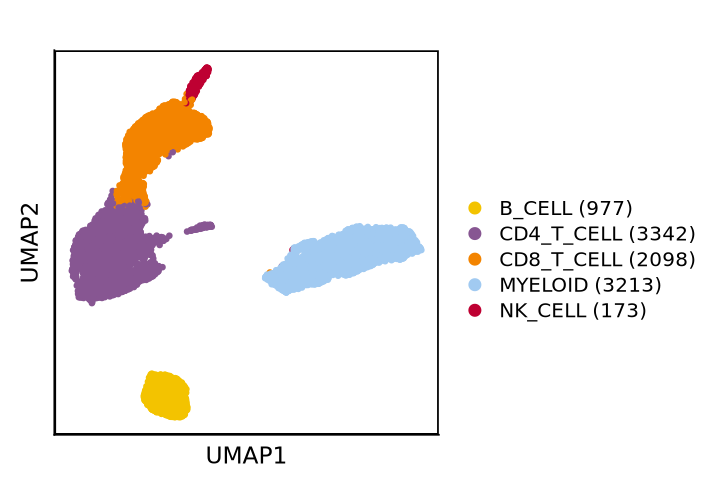

In [ ]:
options(repr.plot.width=6, repr.plot.height=4)
scUMAP(obj, reduction = "umap", group.by = "celltypes", count = T, pt.size = 1.2, cols = kelly, shuffle = T)

In [ ]:
Idents(obj) <- "celltypes"
markers <- FindAllMarkers(obj, 
    test = "wilcox", 
    only.pos = FALSE, 
    min.pct = 0.1, 
    logfc.threshold = -Inf, 
    return.thresh = 1,
    assay = "RNA")

Calculating cluster CD4_T_CELL

Calculating cluster CD8_T_CELL

Calculating cluster MYELOID

Calculating cluster B_CELL

Calculating cluster NK_CELL



Step 1 : Formatting gene list

Step 2 : Summarizing gene expression

Warning message:
“No layers found matching search pattern provided”
Warning message:
“The following requested variables were not found: NKG2D”
Step 3 : Annotating expression significance

Step 4 : Construct final expression dataframe

Step 5 : Plotting gene expression

Step 1 : Formatting gene list

Step 2 : Summarizing gene expression

Step 3 : Annotating expression significance

Step 4 : Construct final expression dataframe

Step 5 : Plotting gene expression



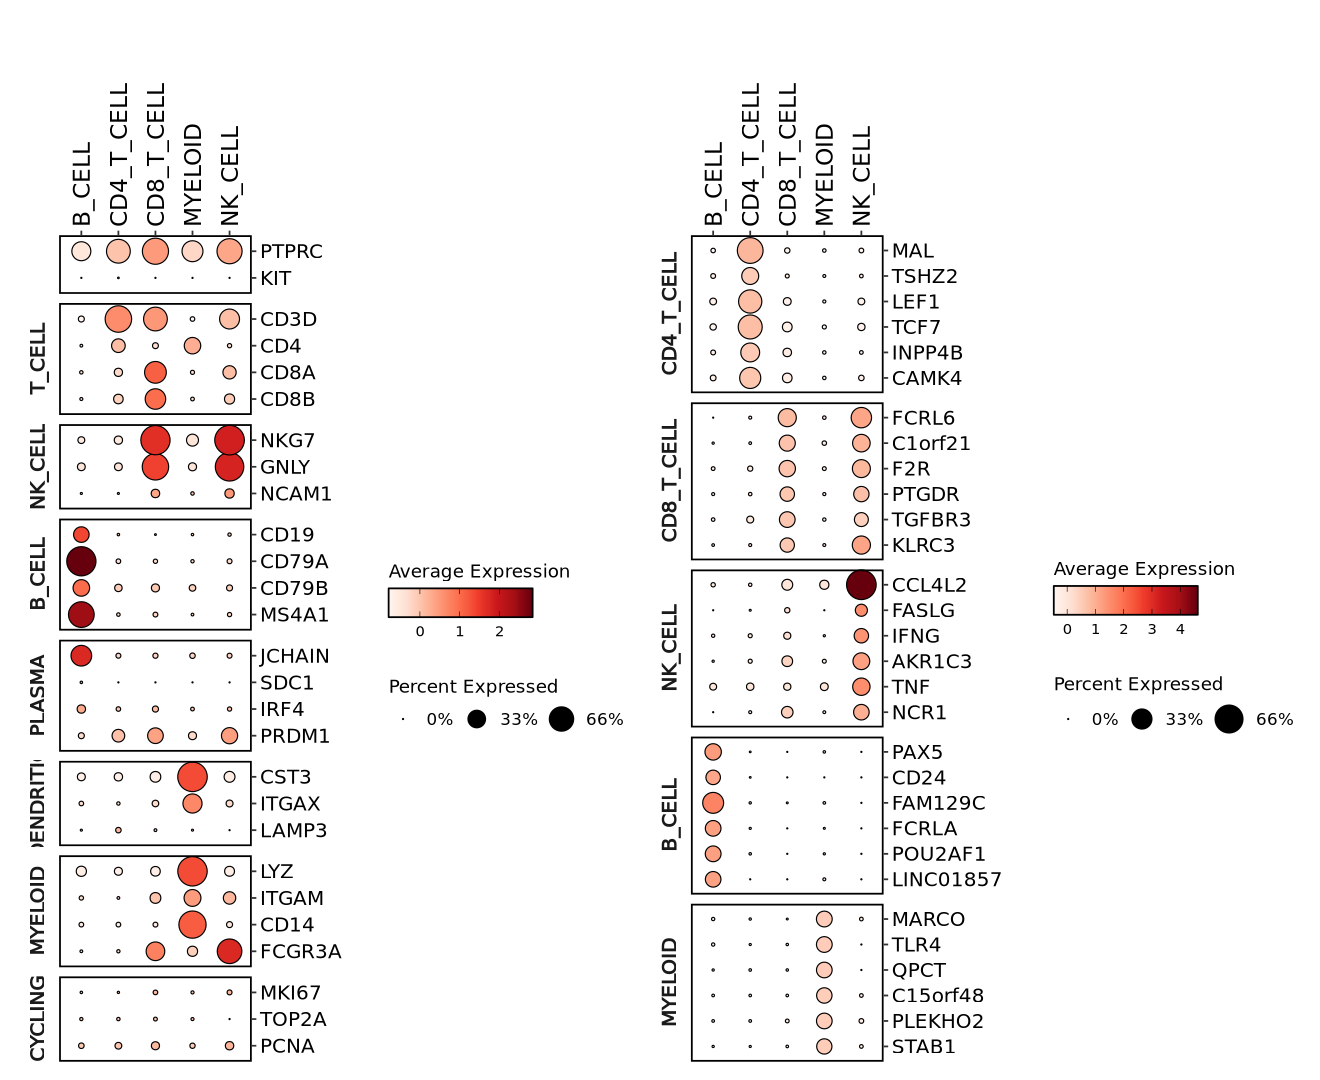

In [ ]:
options(repr.plot.width=11, repr.plot.height=9)
p1 <- scDotPlot(obj, features = immune.list.hs, group.by = "celltypes", assay = "RNA", scale = T)
genelist <- select_top_deg(markers, n = 6, rank_by = "p_val_adj")
genelist <- genelist[c(1:2,5,4,3)]
p2 <- scDotPlot(obj, features = genelist, group.by = "celltypes", assay = "RNA", scale = T)
p1 + p2